# Adiabatic or abrupt changes in time

In [26]:
import numpy as np
import scipy.sparse
import scipy.linalg as la

In [1]:
from timeprop import propagate

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
import holoviews as hv
%load_ext holoviews.ipython
%output holomap='auto'

In [71]:
def make_hamiltonian(L=100, pot_func=None, time=0):
    t = 1
    
    ham = np.zeros(shape=(L, L), dtype=complex)
    
    if pot_func is not None:
        pot = np.array([pot_func(i, time) for i in range(L)], dtype=float)
    else:
        pot = np.zeros(shape=(L,), dtype=float)

    np.fill_diagonal(ham, 2 * t + pot)
    
    offdiag = np.zeros(shape=(L-1,), dtype=complex)
    offdiag[:] = -t
    np.fill_diagonal(ham[1:, :-1], offdiag)
    np.fill_diagonal(ham[:-1, 1:], offdiag)
    
    # finally, periodic boundary conditions
    ham[0, -1] = -t
    ham[-1, 0] = -t
    
    return scipy.sparse.csr_matrix(ham), pot

### Let's look at an example potential

#### First a potential that changes abruptly in time

In [72]:
wf_index = 0

In [78]:
L = 200
def pot_abrupt(i, t):
    if t < 50:
        width = L/1.7
    else:
        width = L

    return np.tanh((i - width + 30) / 5) + 1 - np.tanh((i - 30) / 5) + 1

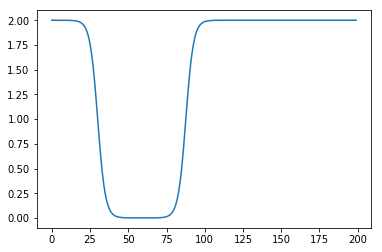

In [89]:
xs = np.arange(L)
plt.plot(xs, pot_abrupt(xs, 0))

In [82]:
ham, pot = make_hamiltonian(L, pot_abrupt, 0)
psi_0 = la.eigh(ham.todense())[1][:, wf_index]

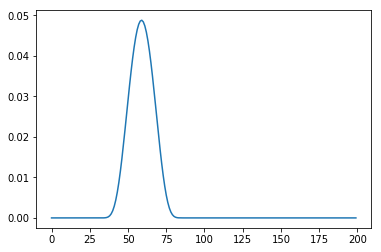

In [83]:
plt.plot(abs(psi_0)**2)

In [90]:
psis = []
pots = []
psi = psi_0.copy()
for n in range(300):
    ham, pot = make_hamiltonian(L, pot_abrupt, n)
    if n%3 == 0:
        pots.append(pot)
        psis.append(psi)
    psi = propagate(ham, psi, 10)

:HoloMap   [time]
   :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
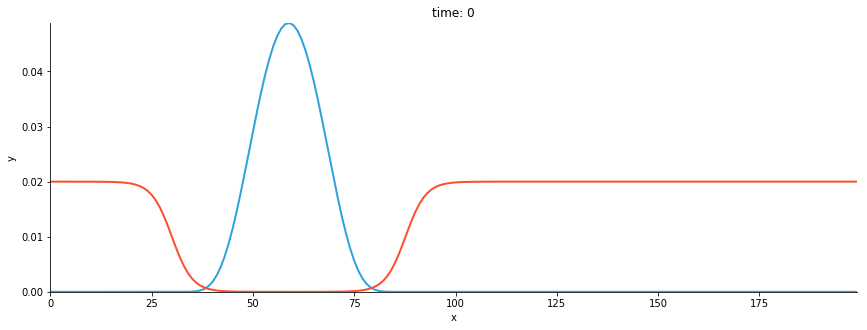
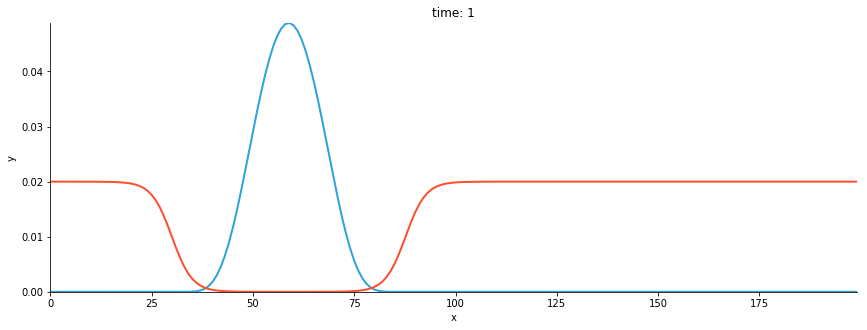
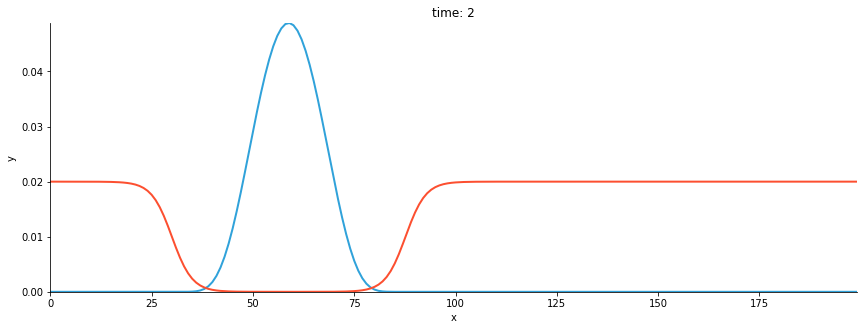
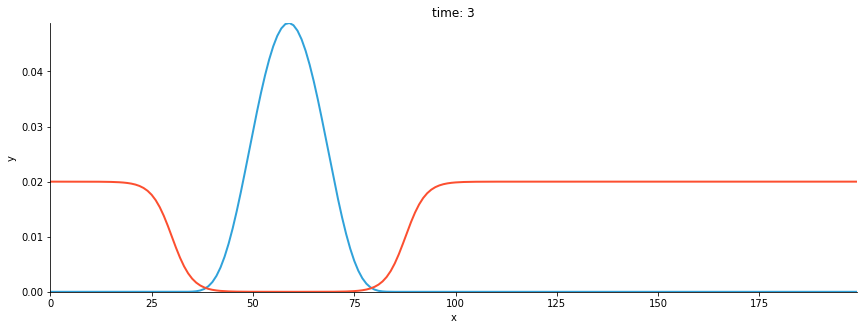
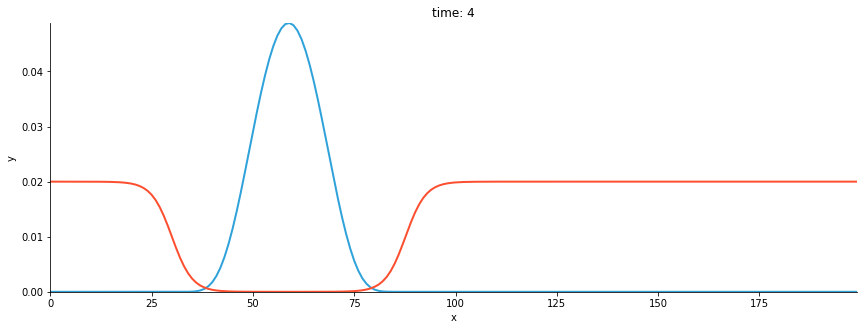
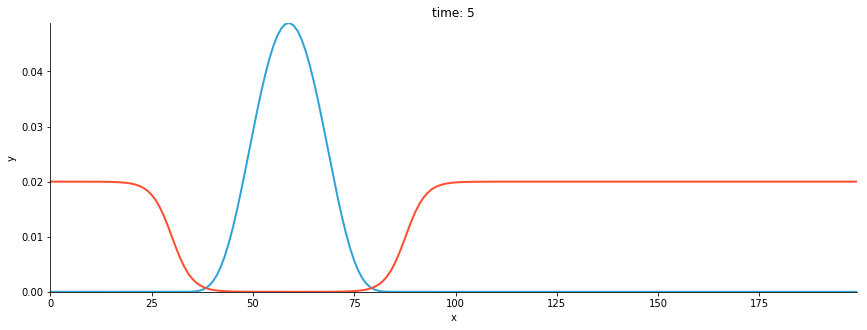
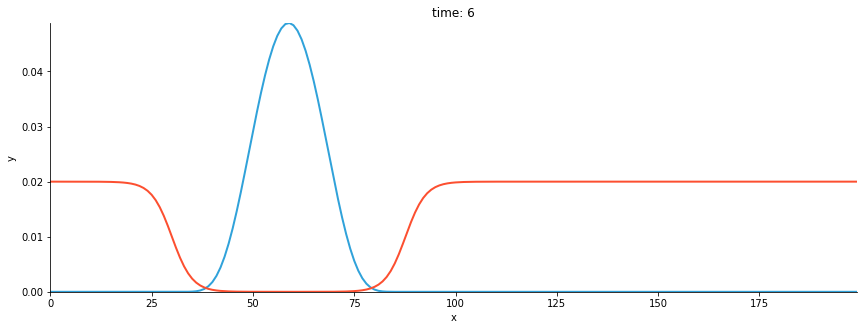
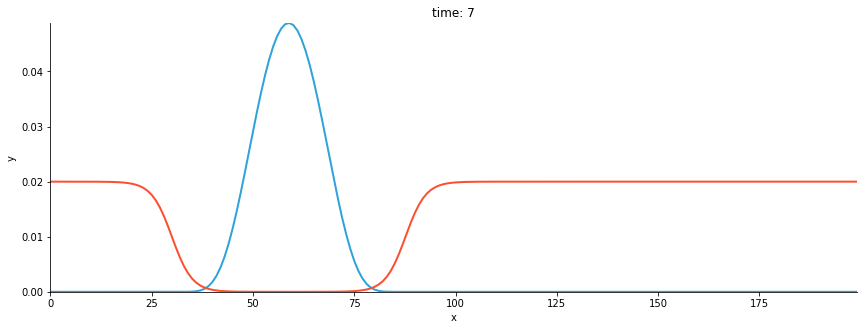
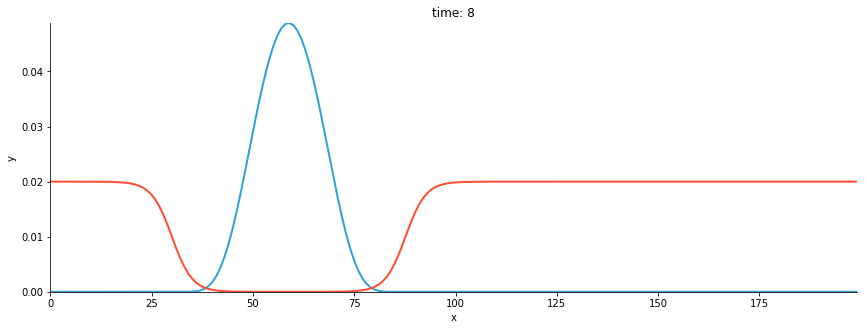
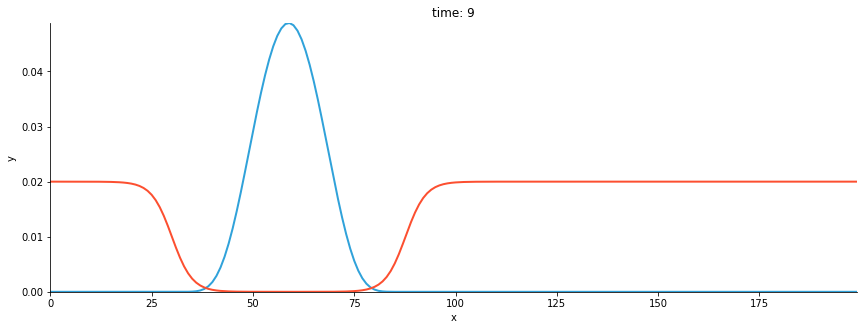
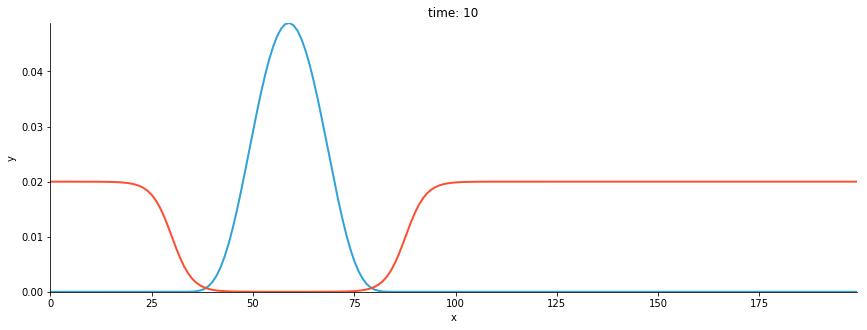
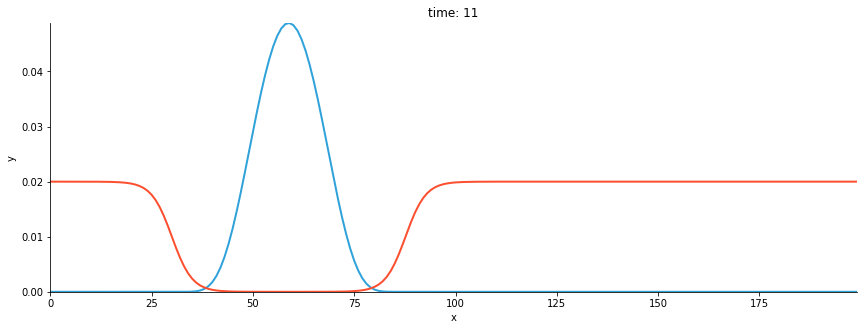
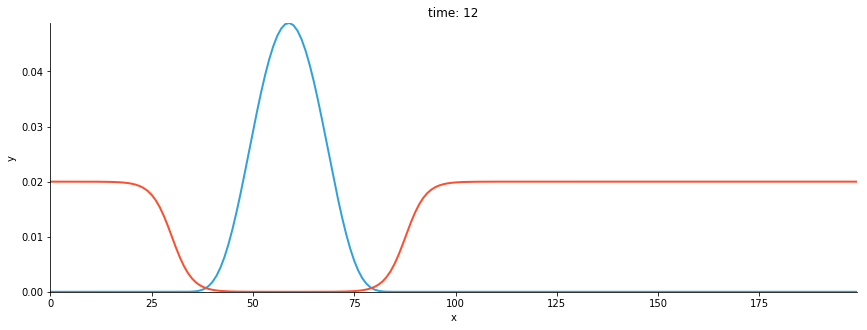
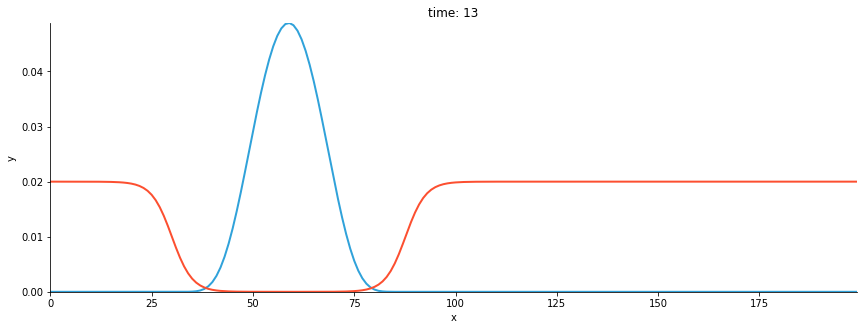
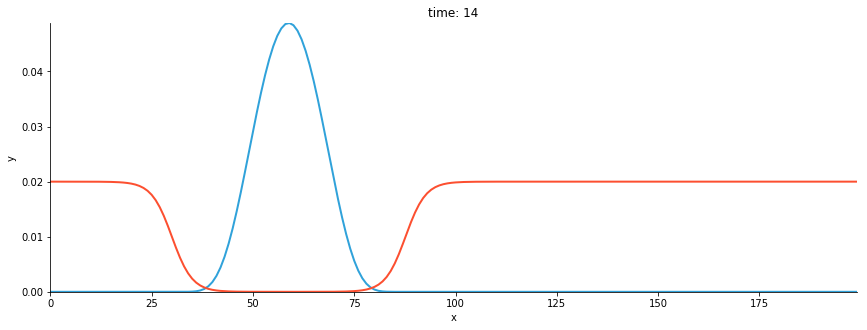
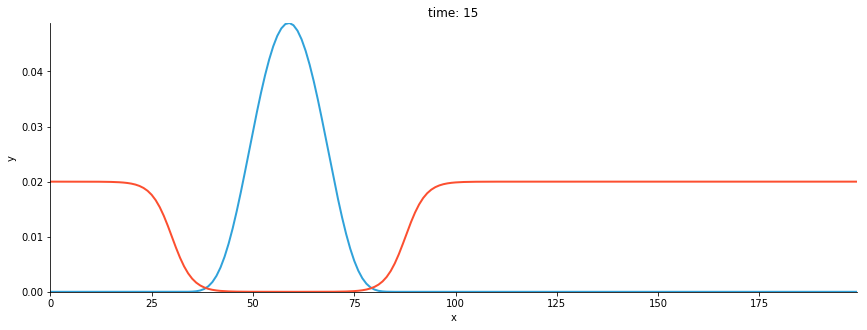
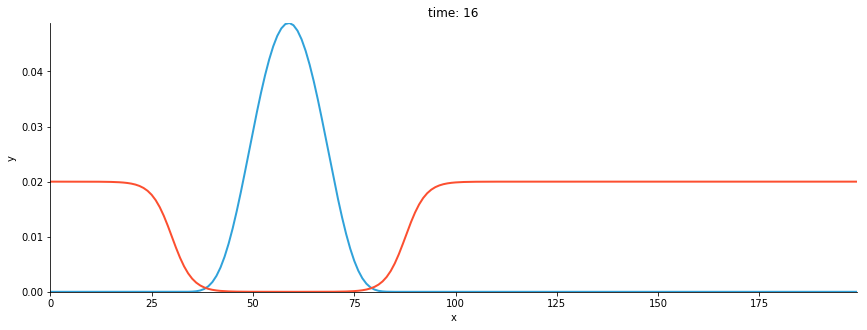
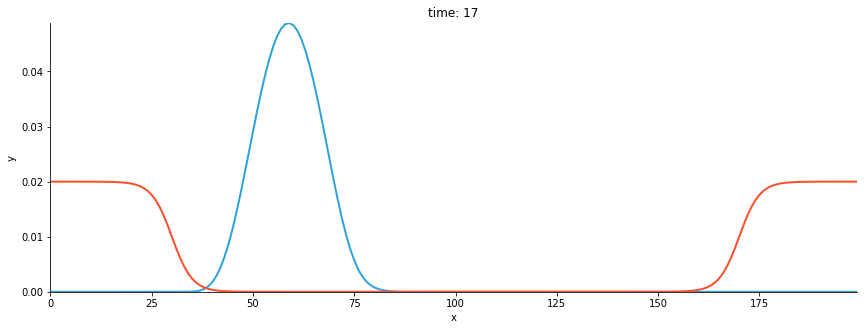
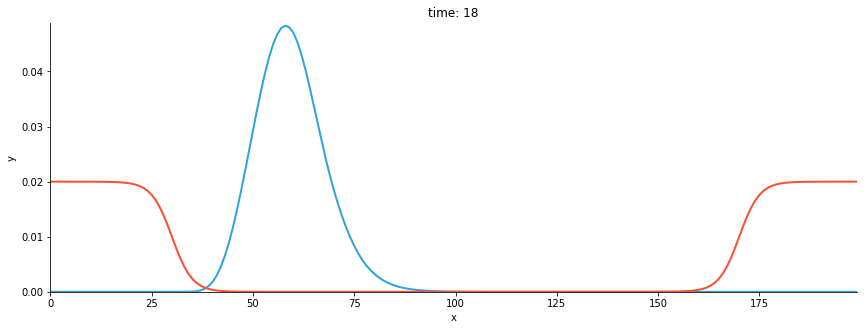
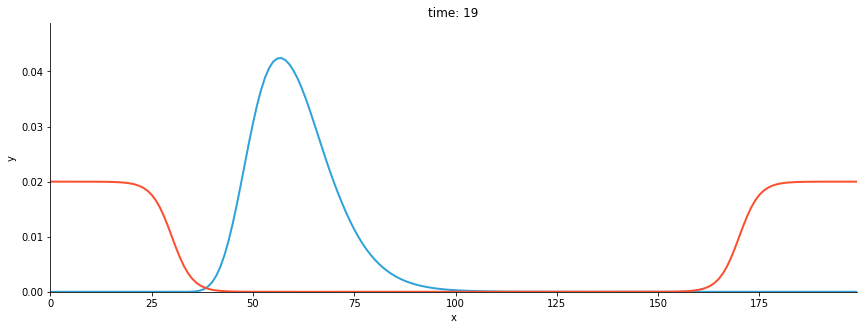
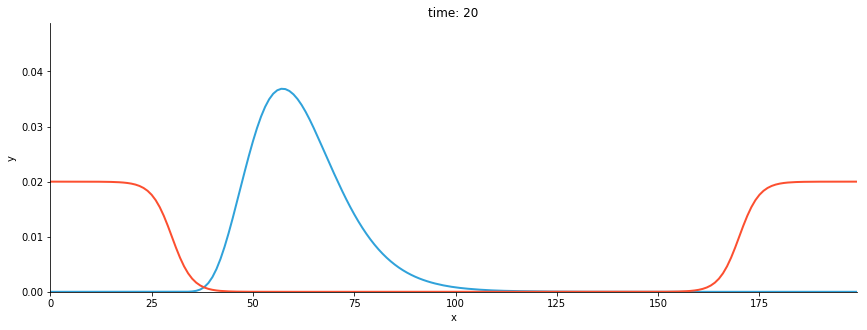
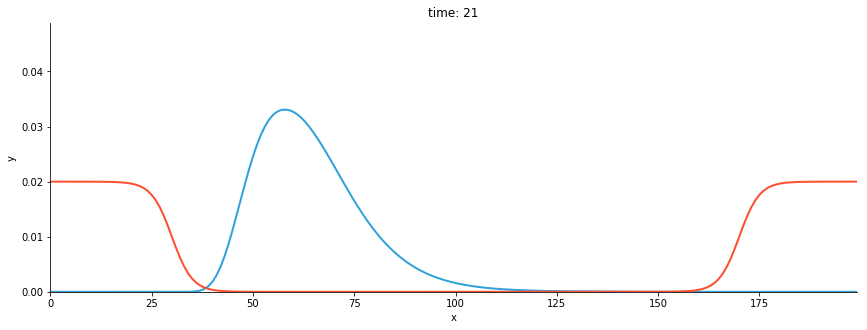
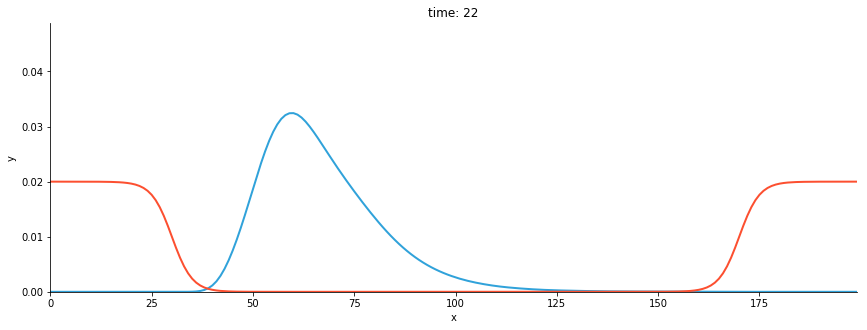
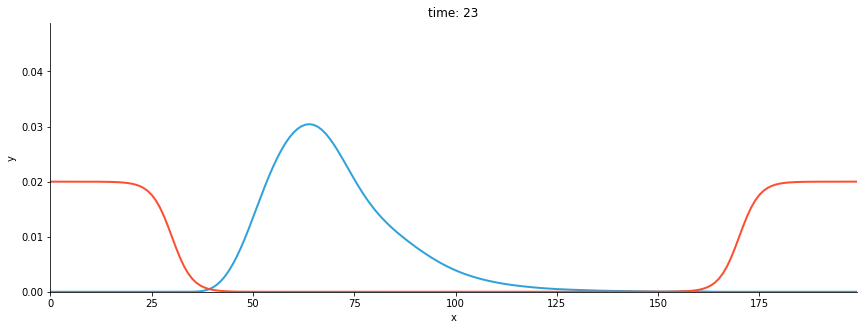
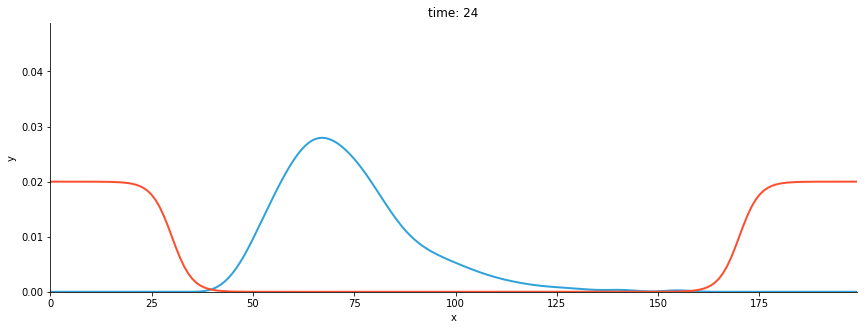
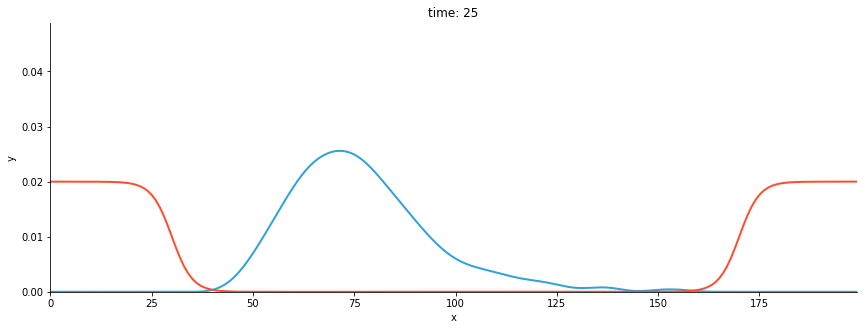
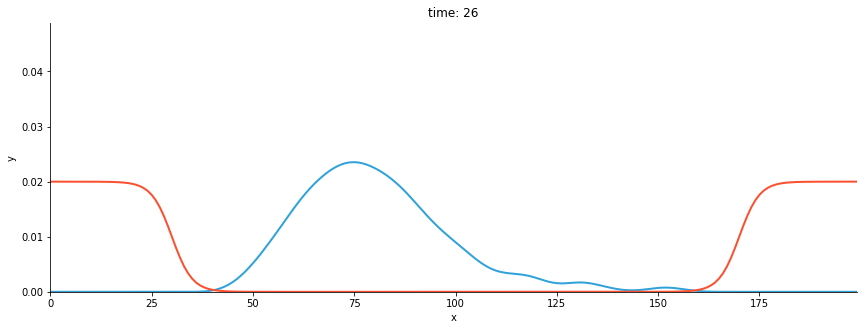
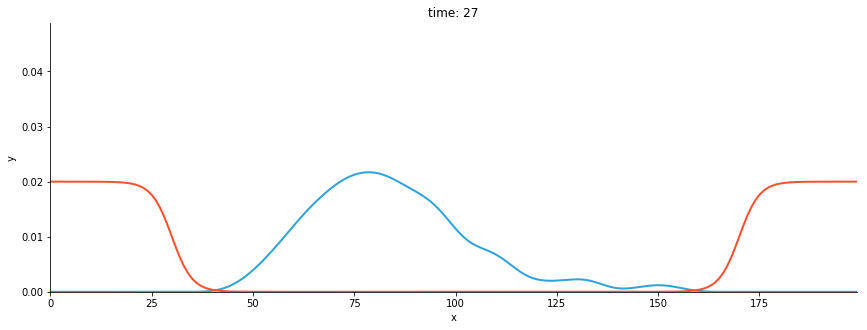
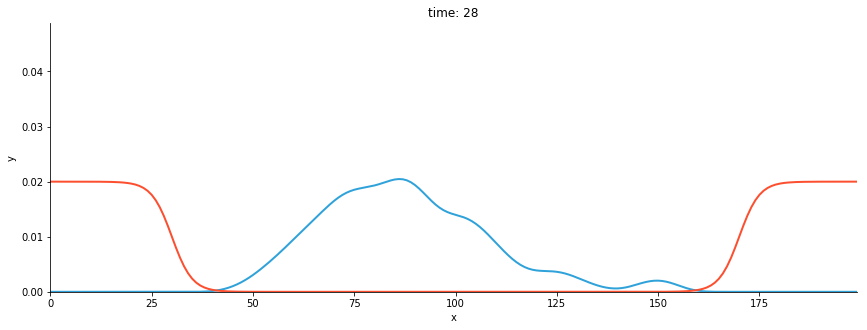
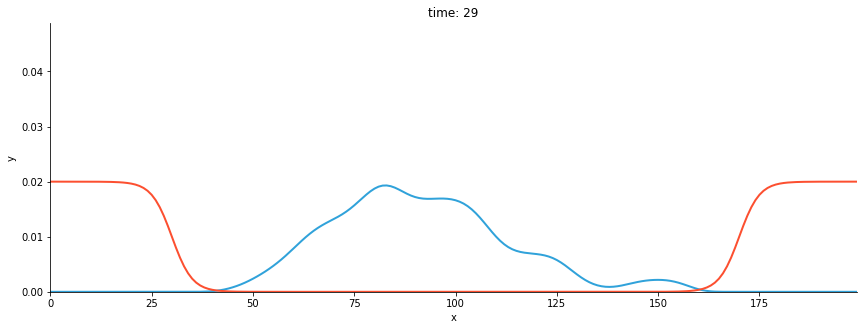
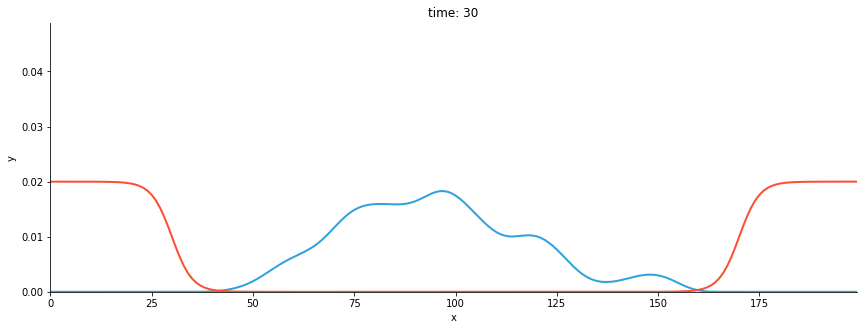
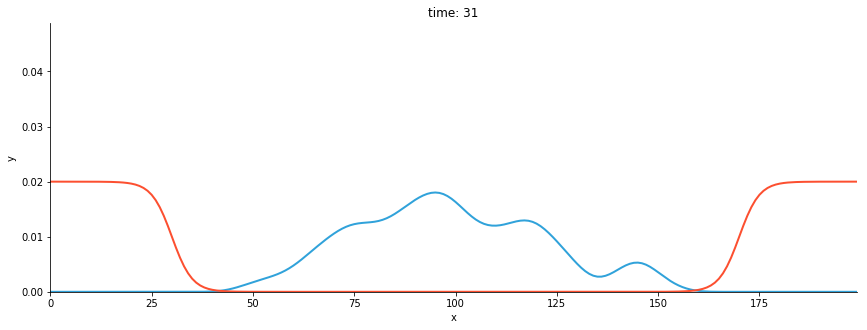
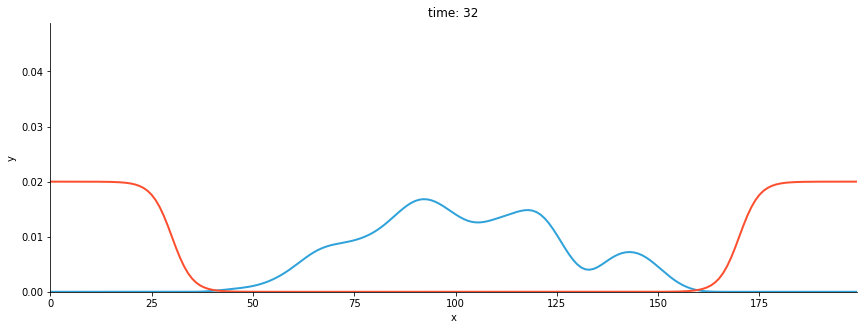
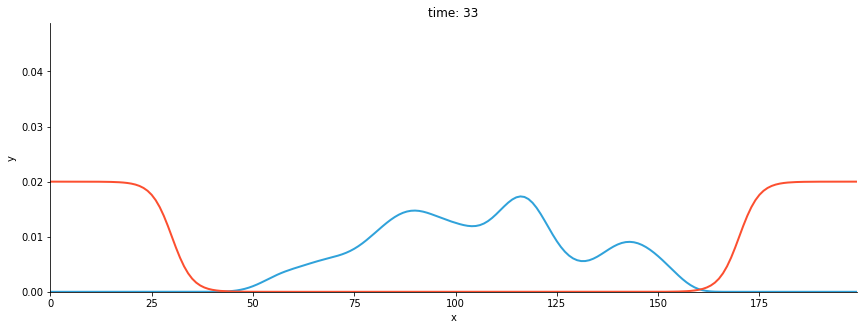
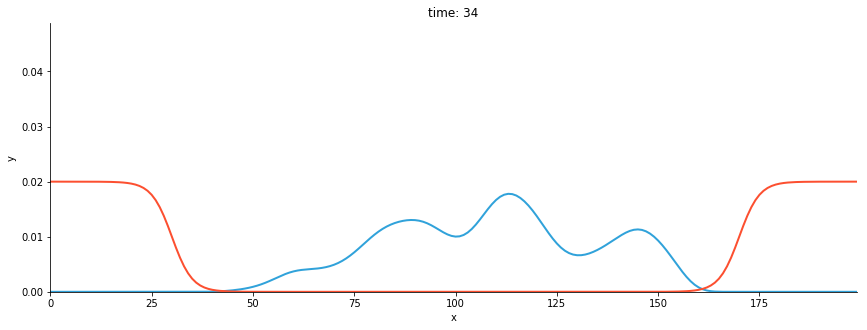
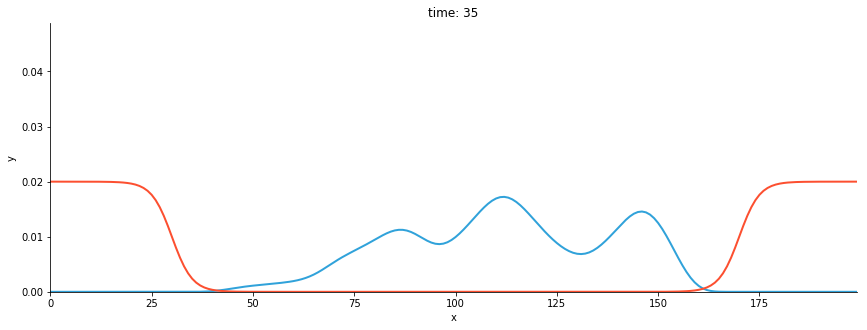
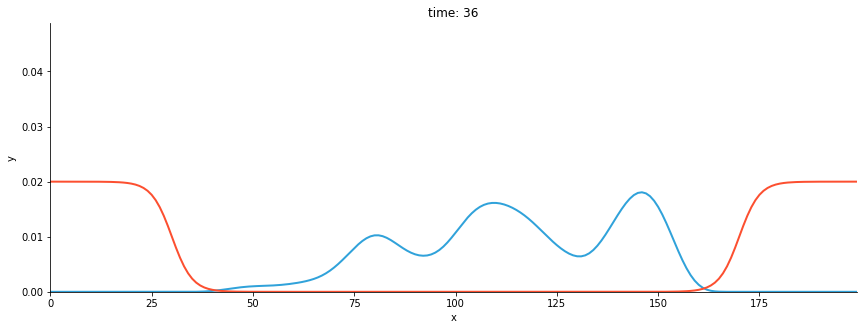
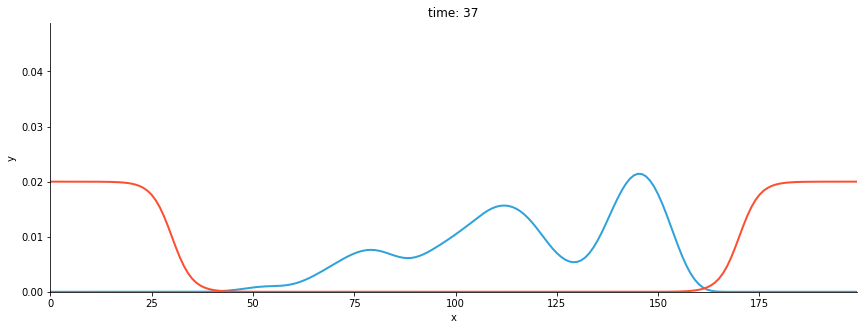
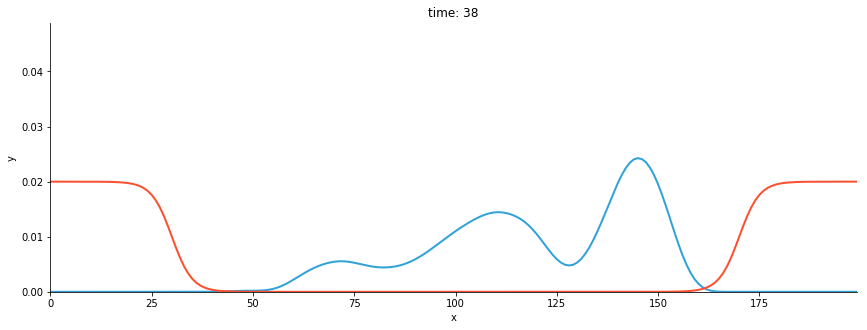
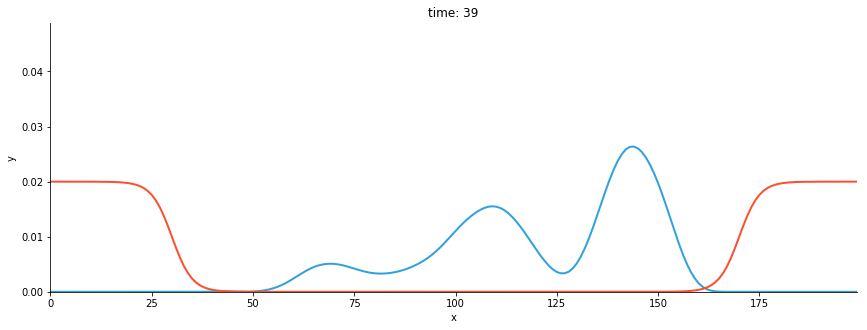
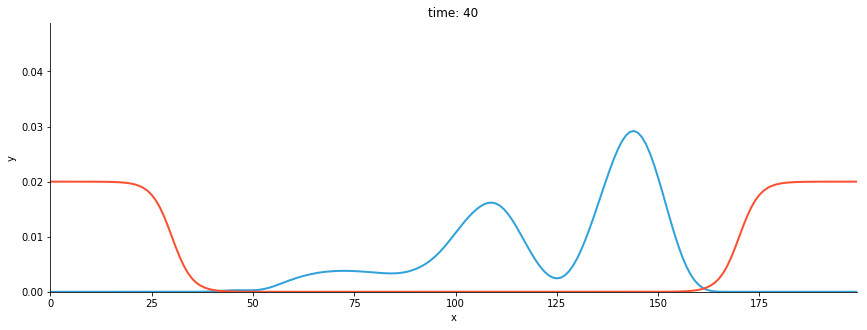
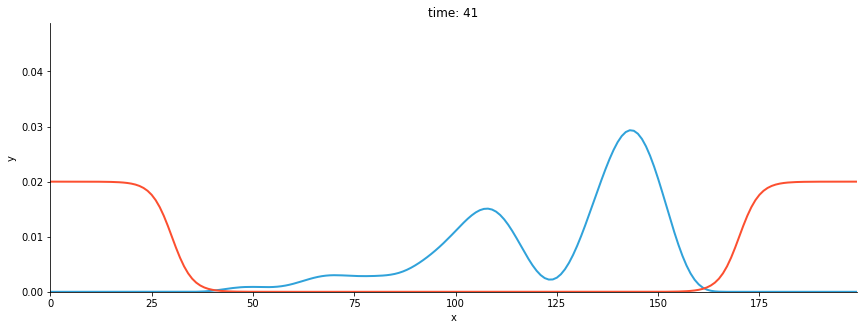
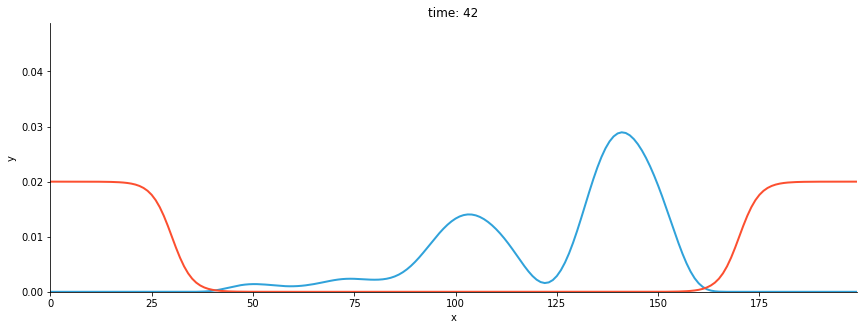
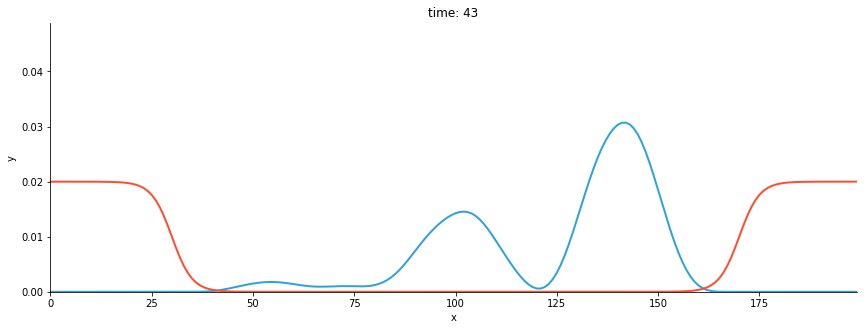
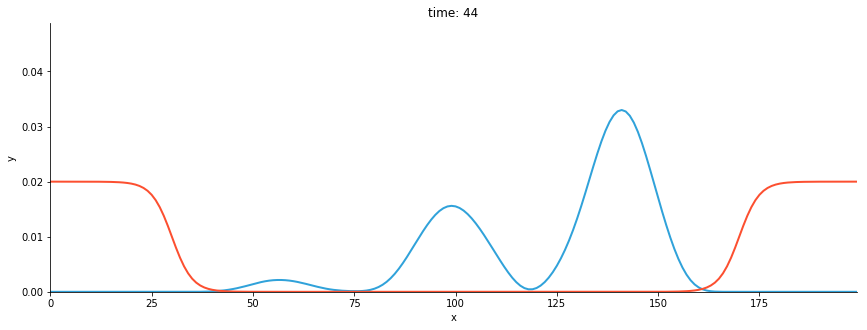
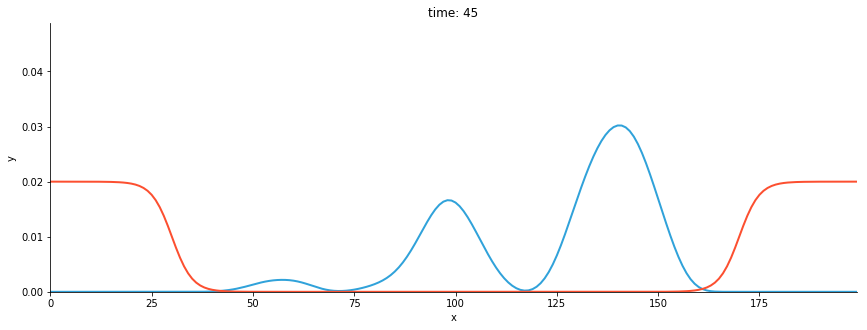
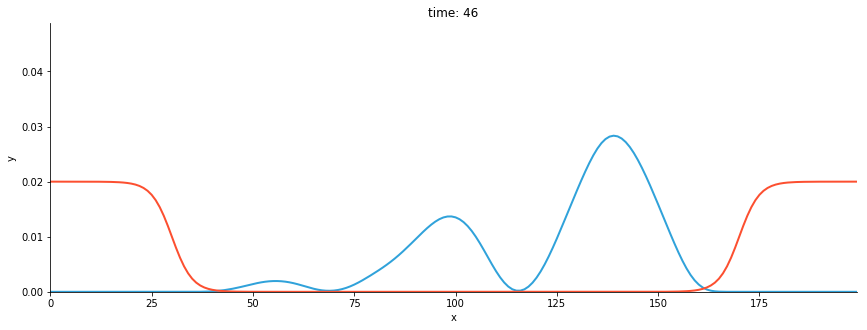
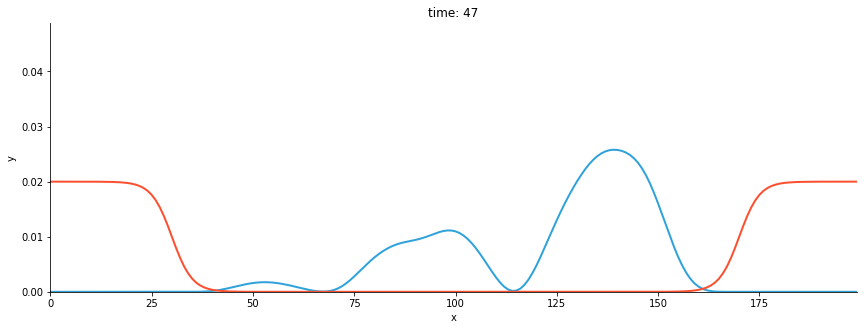
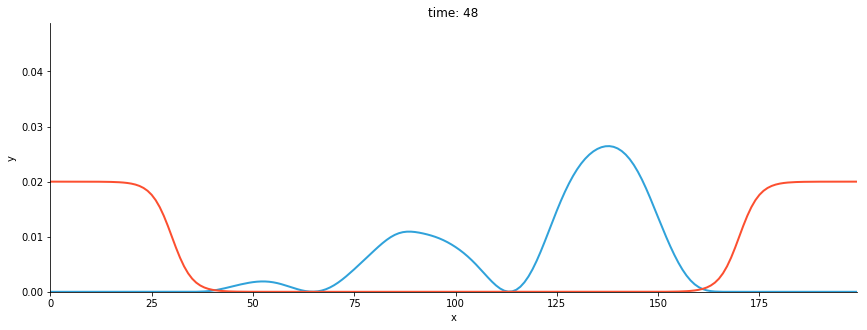
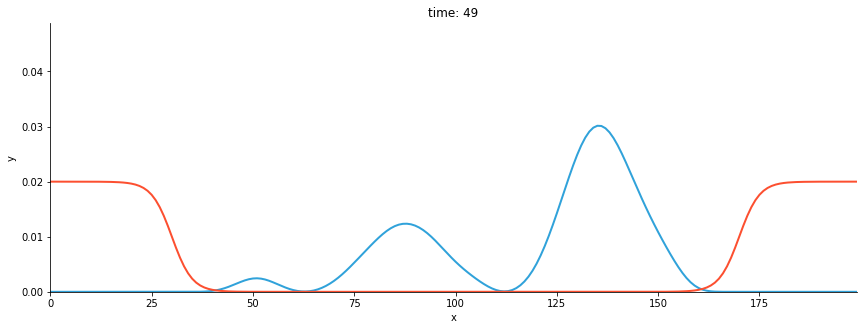
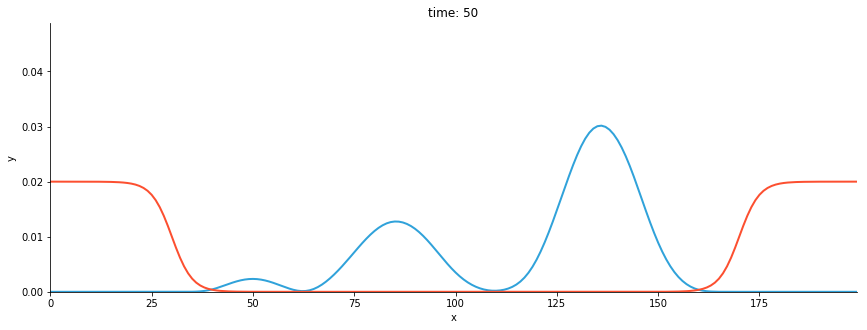
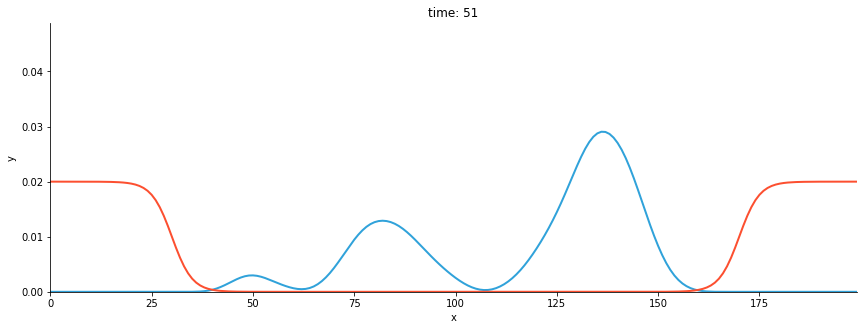
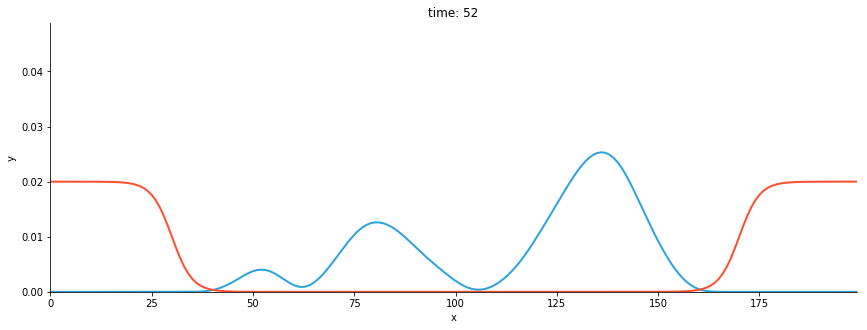
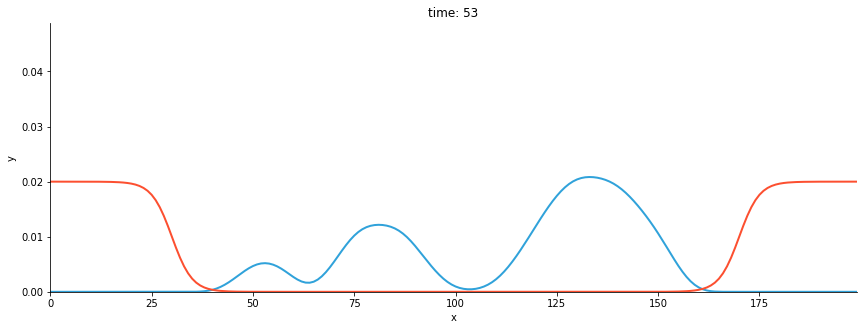
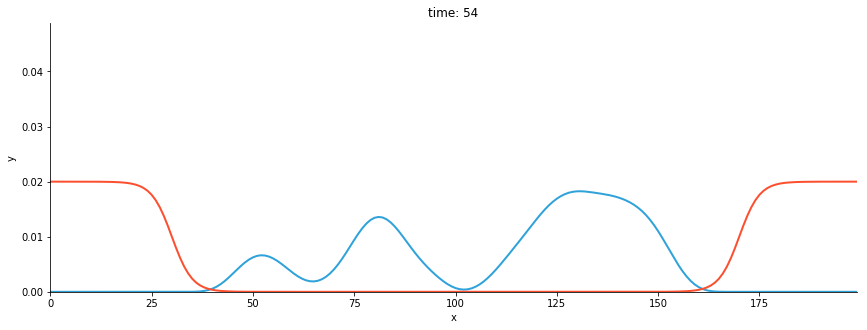
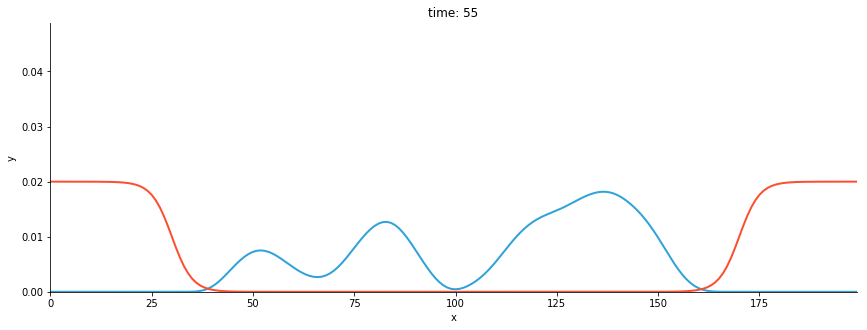
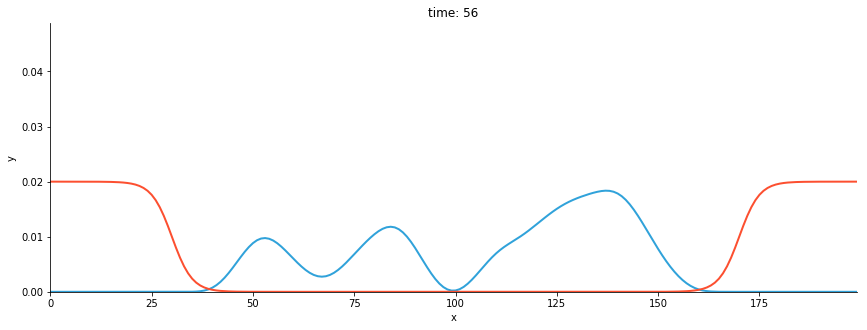
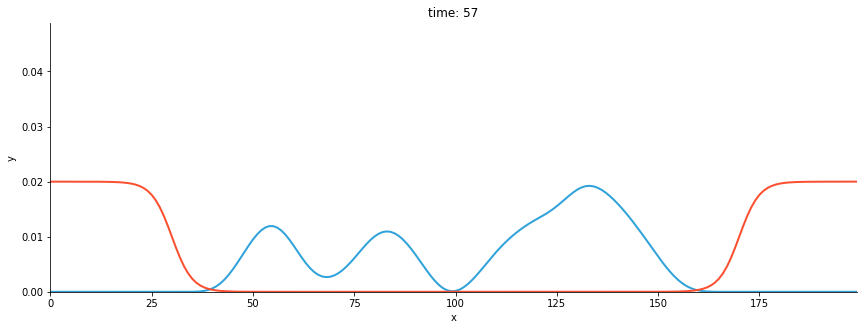
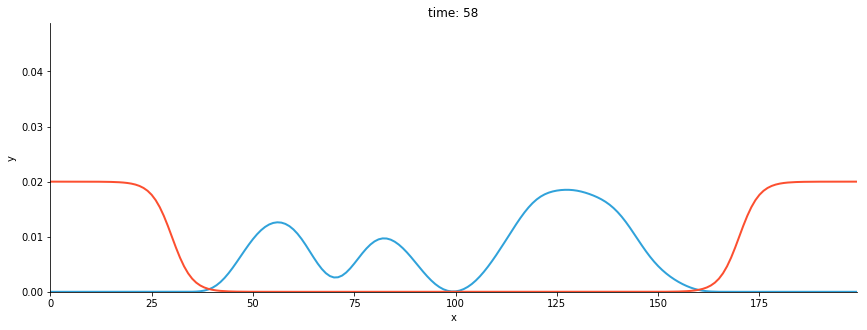
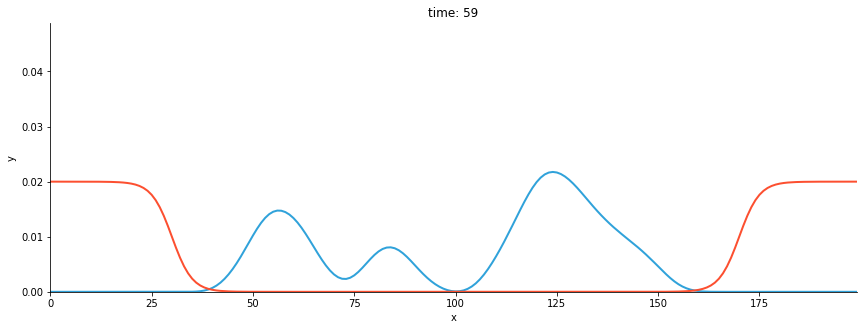
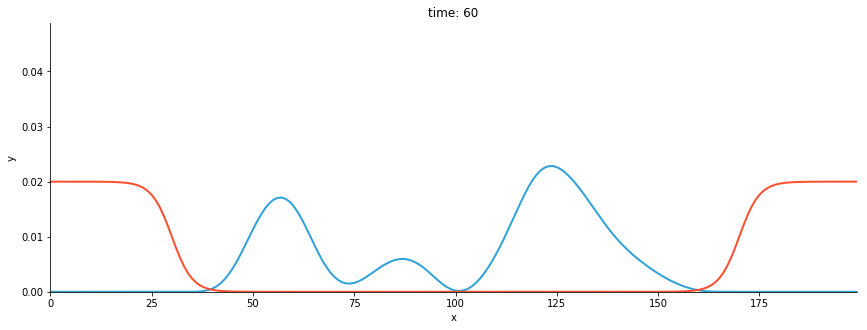
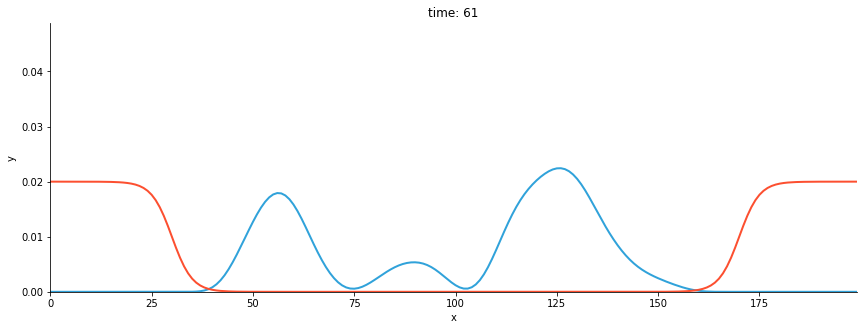
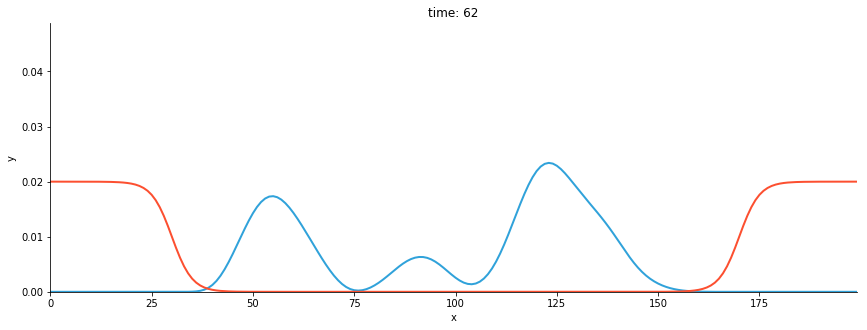
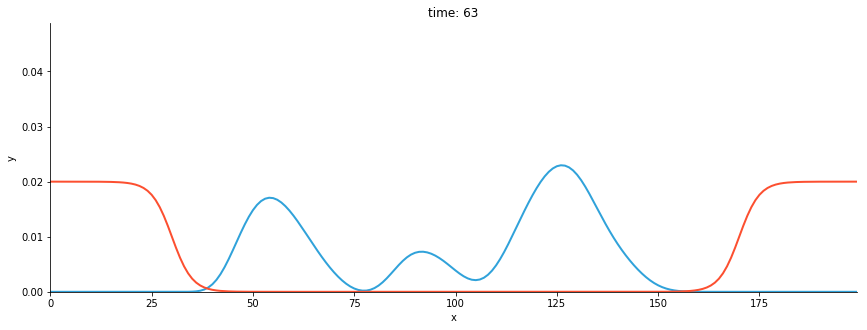
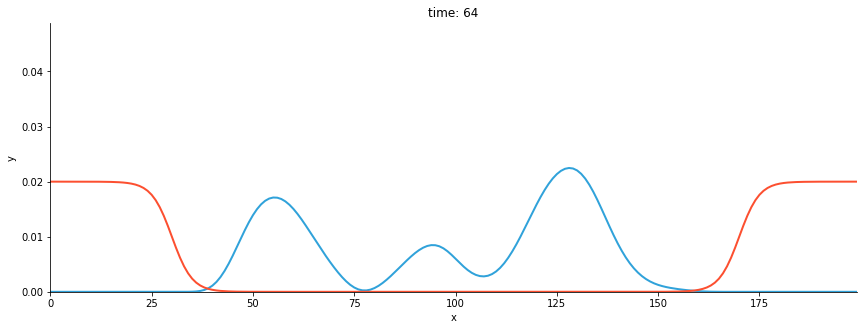
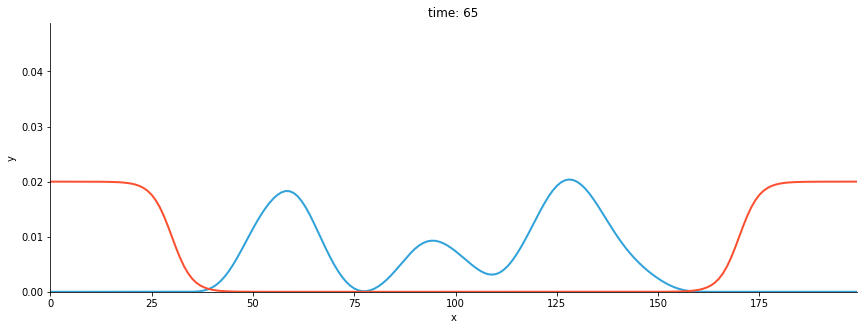
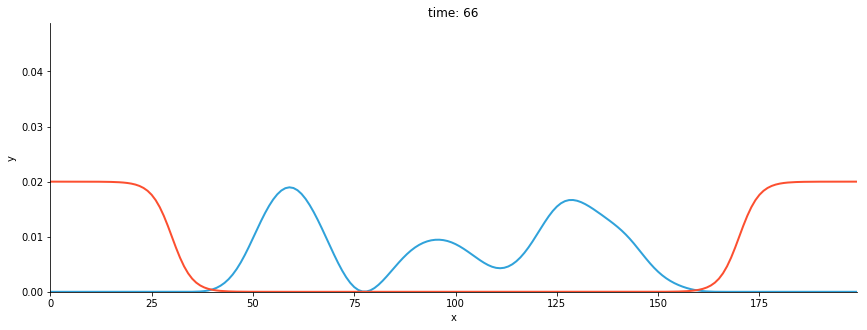
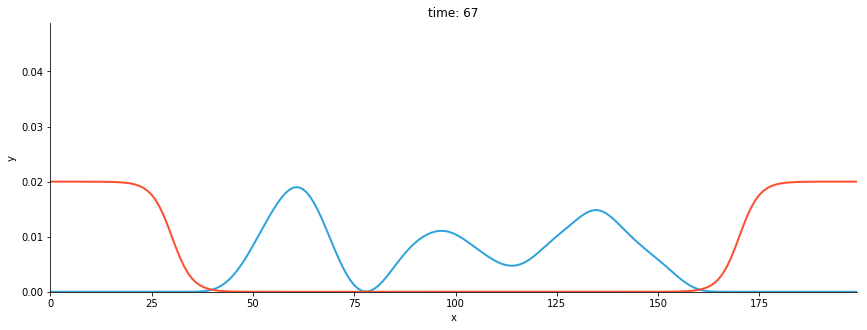
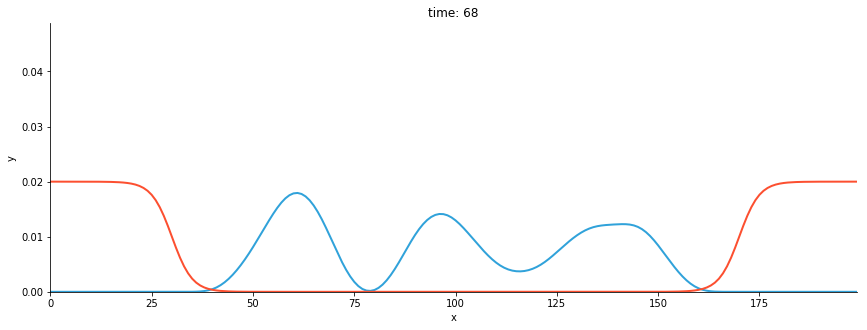
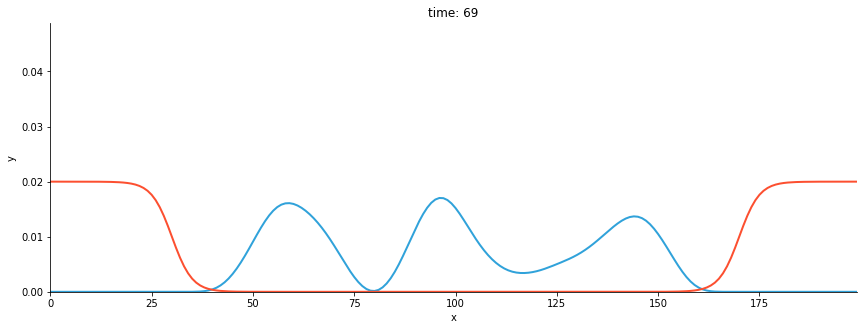
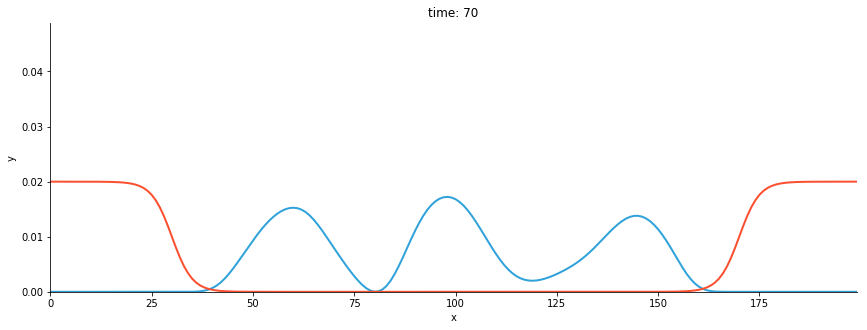
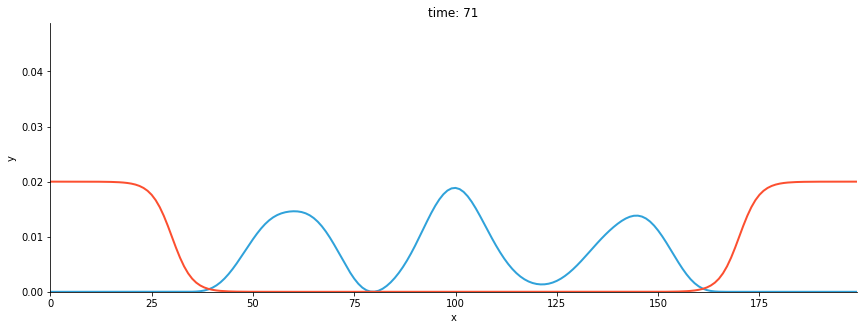
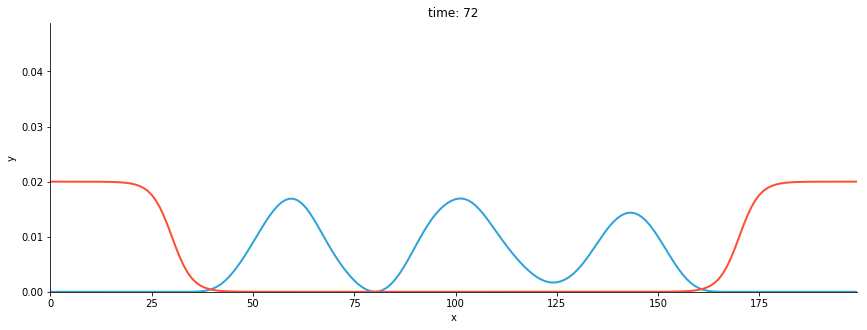
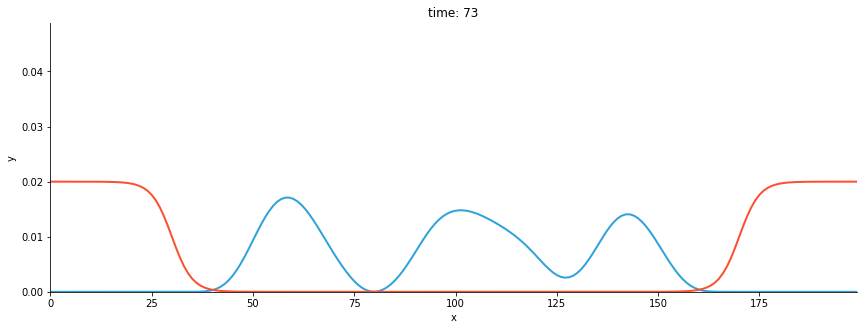
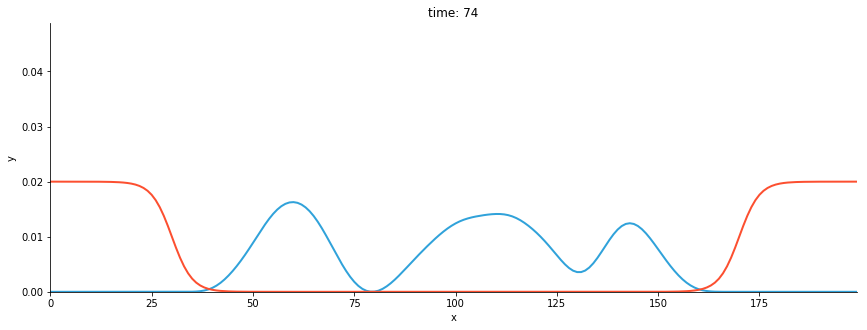
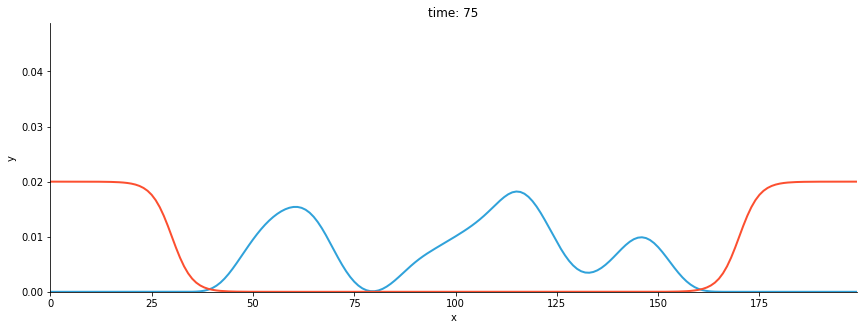
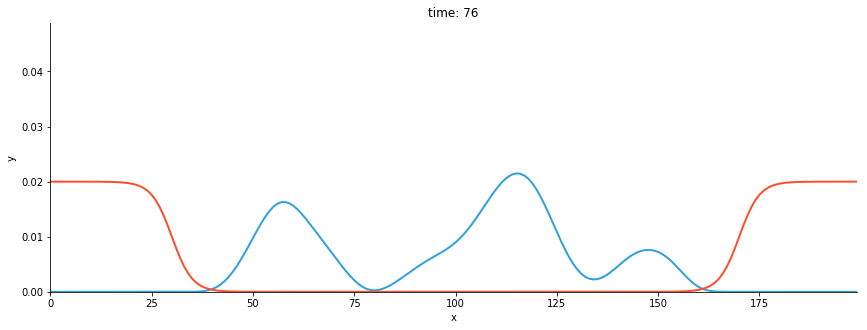
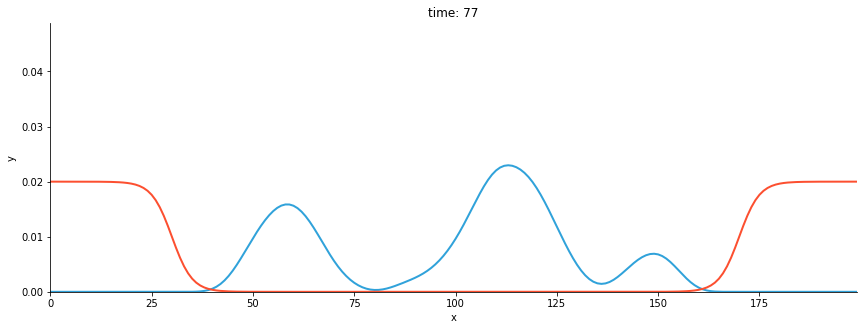
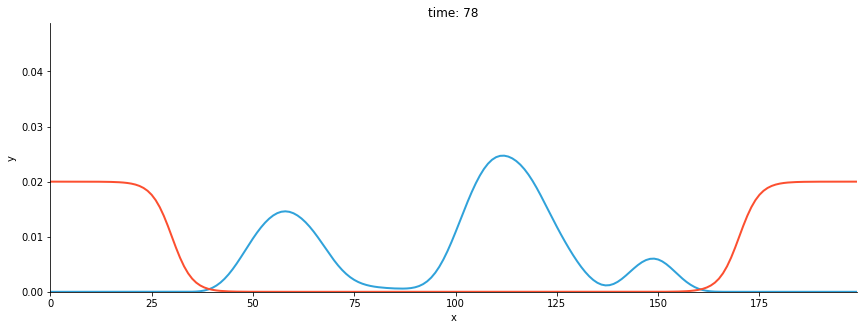
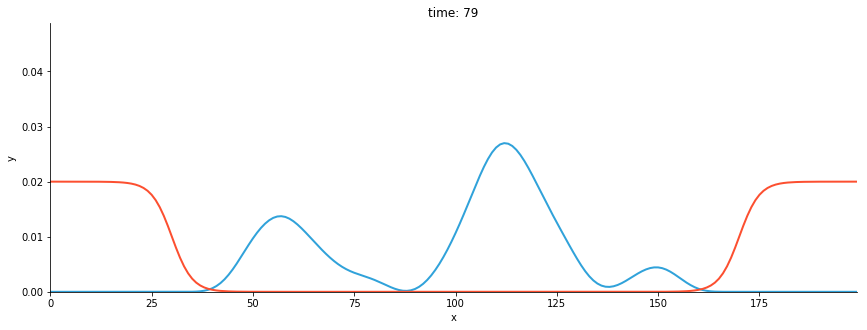
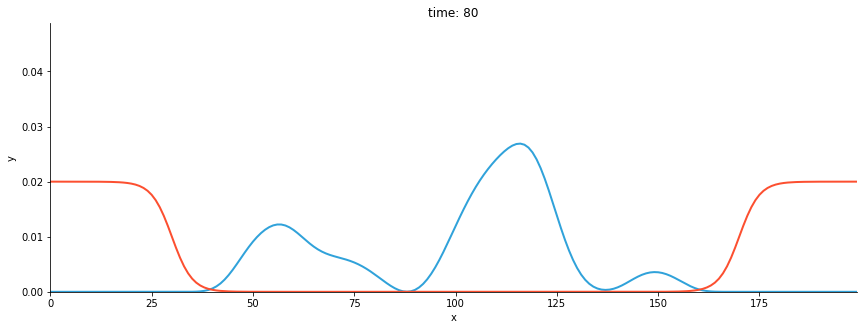
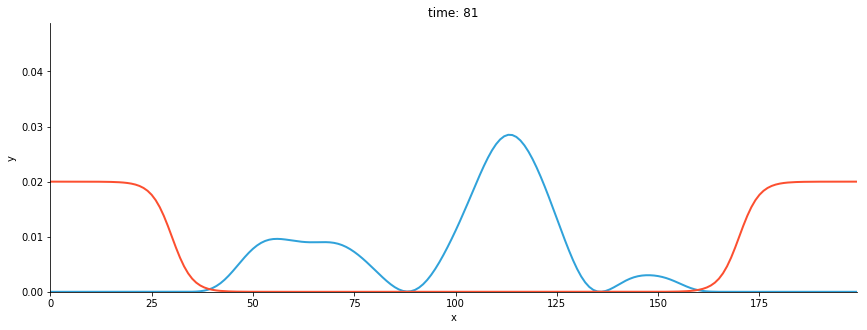
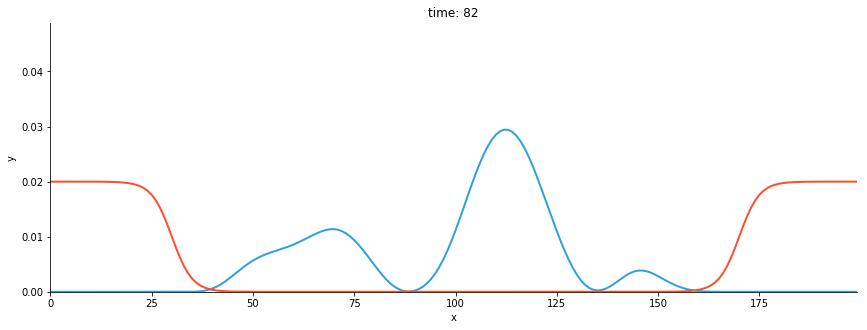
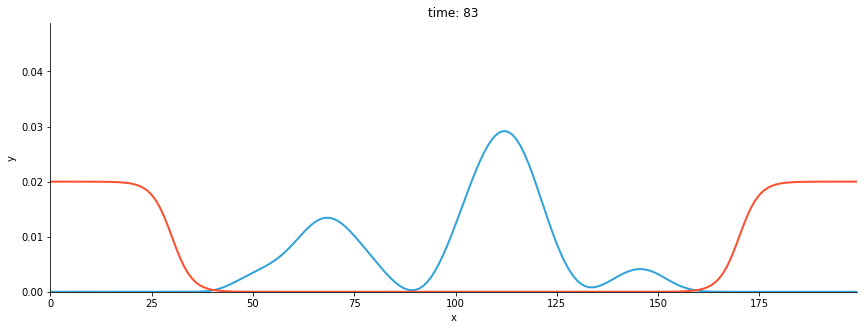
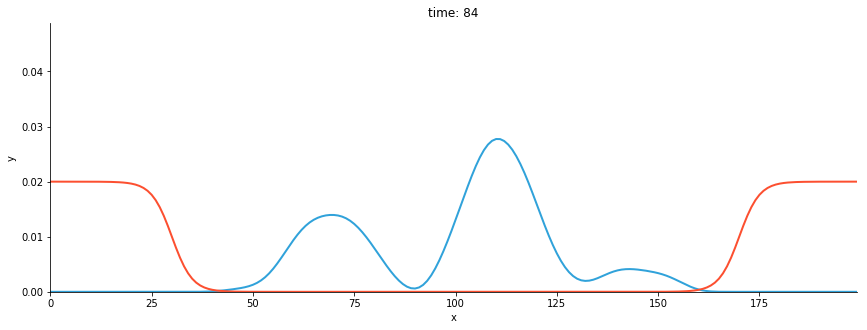
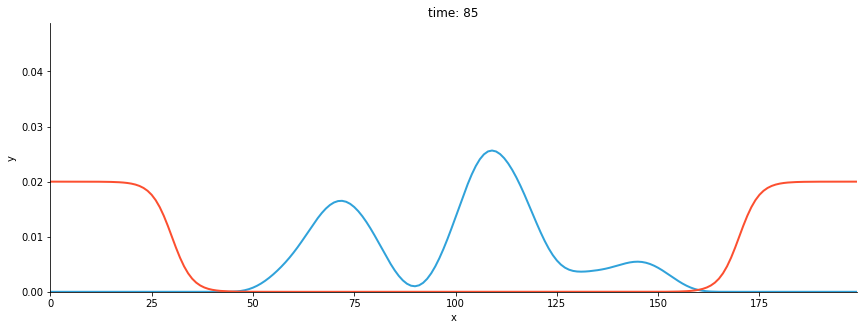
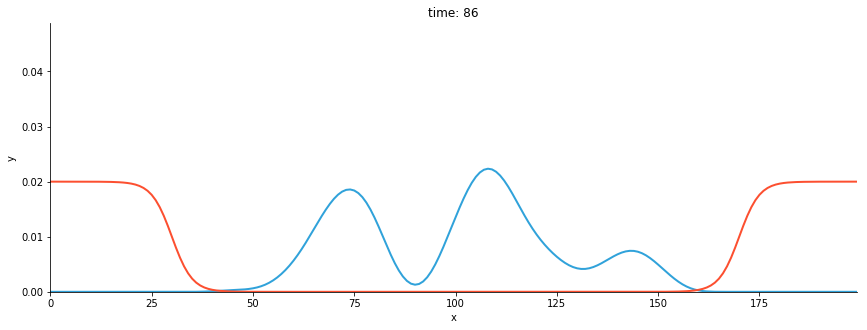
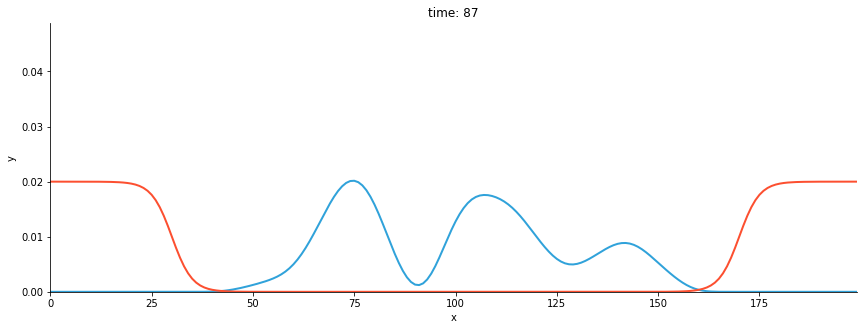
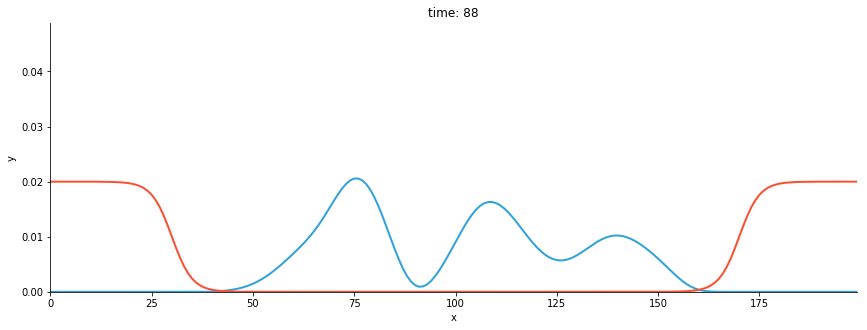
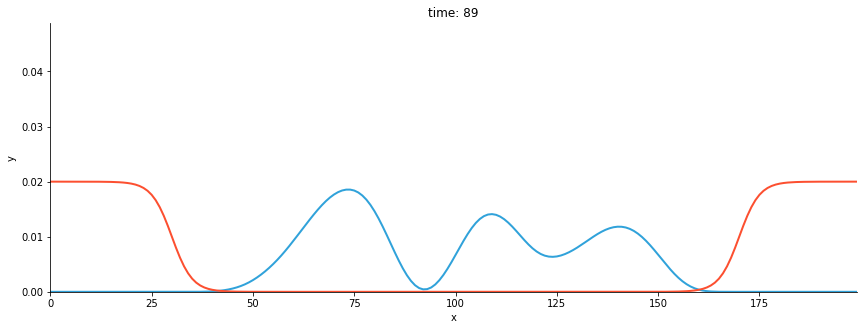
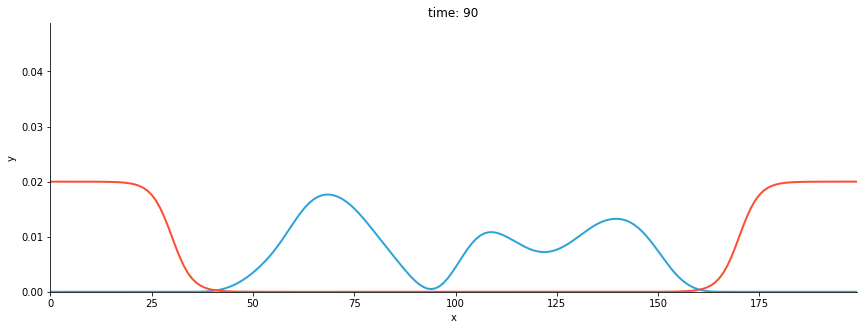
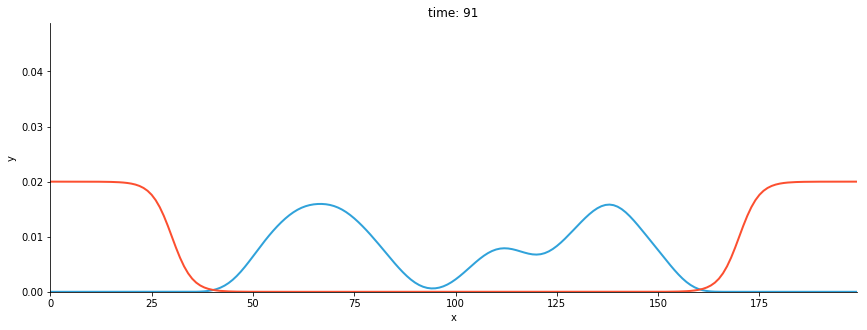
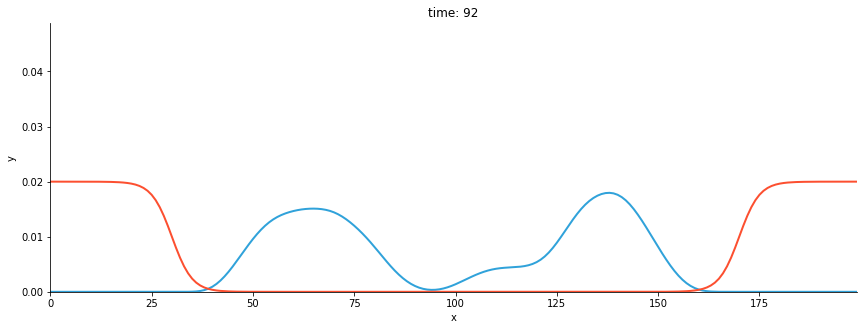
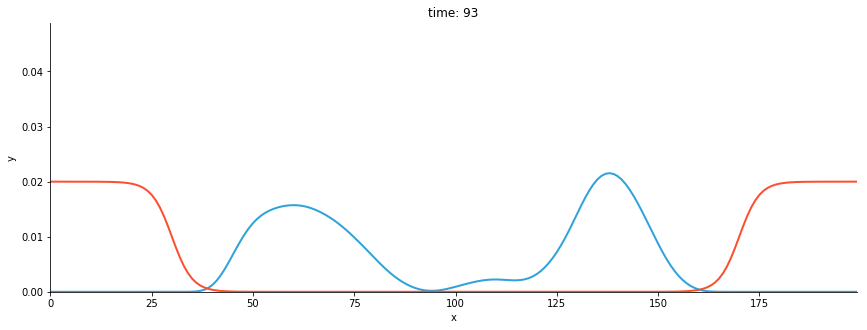
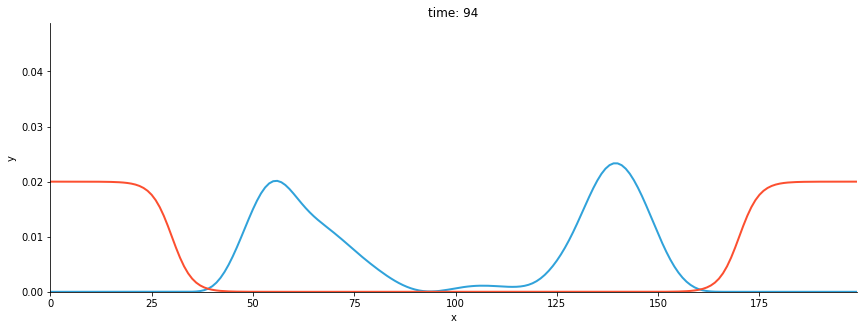
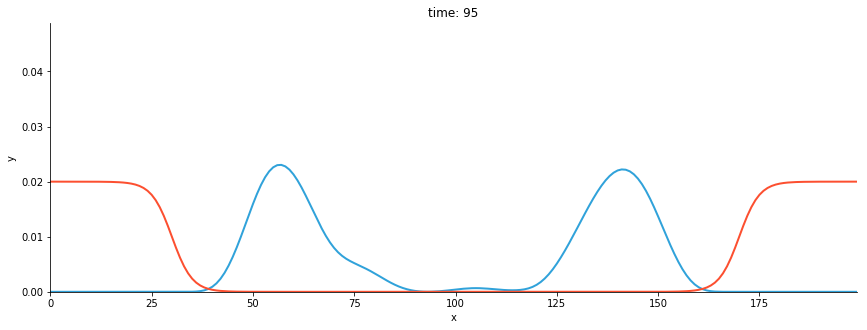
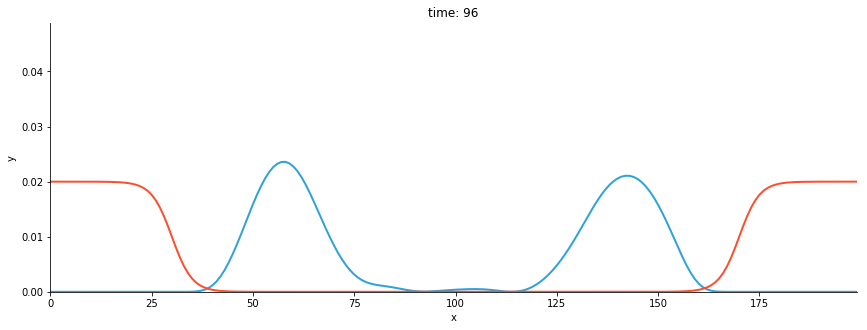
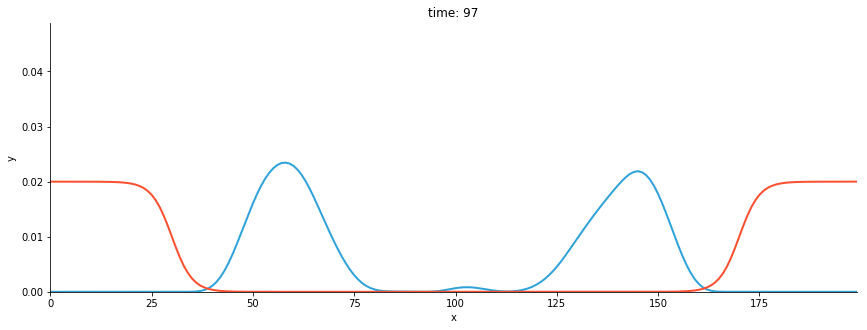
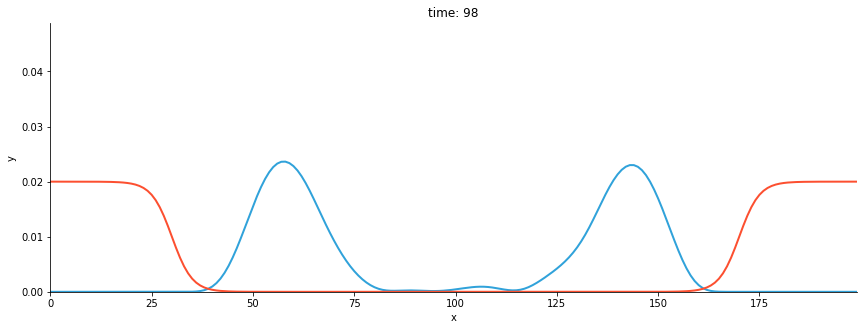
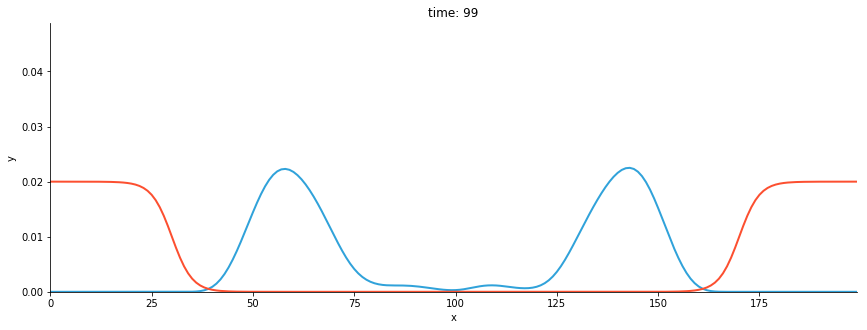

In [93]:
%%opts Overlay plot[aspect=3]
%%output size=400

dimensions = ["time"]
hv.HoloMap([(t, hv.Curve(abs(psis[t])**2)  * hv.Curve(pots[t].real*0.01))
            for t in range(len(psis))], kdims=dimensions, )

#### Slow change of potential

In [103]:
wf_index = 1

In [104]:
L = 200
def pot_slow(i, t):
    width = L/1.7 + t/600 * (L - L/1.7)

    return np.tanh((i - width + 30) / 5) + 1 - np.tanh((i - 30) / 5) + 1

In [107]:
ham, pot = make_hamiltonian(L, pot_slow, 0)
psi_0 = la.eigh(ham.todense())[1][:, wf_index]

In [ ]:
psis = []
pots = []
psi = psi_0.copy()
for n in range(600):
    ham, pot = make_hamiltonian(L, pot_slow, n)
    if n%6 == 0:
        pots.append(pot)
        psis.append(psi)
    psi = propagate(ham, psi, 2)

In [ ]:
%%opts Overlay plot[aspect=3]
%%output size=400

dimensions = ["time"]
hv.HoloMap([(t, hv.Curve(abs(psis[t])**2)  * hv.Curve(pots[t].real*0.01))
            for t in range(len(psis))], kdims=dimensions, )